In [1]:
import dill

In [2]:
filepath = 'tbmodel.pkl'

In [3]:
dill.load_session(filepath)

In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('merge_sample.csv', encoding='utf-8')

In [6]:
data.head()

,TXRECORD_CREATEDDATE,SYSTEMID,TREATMENTID,HEALTHINSURANCENUMBER,MOBILE,REGISTRATIONDATE,REGISTRATIONNUMBER,TRANSFERIN,TXMX_FACCODE,TXMX_FACNAME,...,PROV,DNAME,DID,PROVID,PA_LAT,PA_LONG,FA_LAT,FA_LONG,DISTANCE_M,DURATION_SEC
0,2017-01-24 08:29:29.987000000,2131941,367895,NaN,NaN,2017-01-10 08:28:19,0007,False,1,NaN,...,Thành phố Hồ Chí Minh,Quận 5,774,79,10.770712,106.652659,10.755038,106.671888,3607,760
1,2018-03-23 16:53:19.440000000,2665072,504738,NaN,NaN,2018-01-05 00:00:00,0007,False,1,NaN,...,Thành phố Hồ Chí Minh,Quận 4,773,79,10.757805,106.706378,10.758377,106.699232,1075,247
2,2018-01-31 13:48:47.813000000,2614672,490974,CN3929221538646,0939097759,2018-01-22 00:00:00,0007,False,1,NaN,...,Thành phố Hồ Chí Minh,Quận Phú Nhuận,768,79,10.803733,106.681670,10.805221,106.686853,2586,529
3,2018-01-08 14:16:58.823000000,2583887,483401,NaN,0987156322,2018-01-05 14:11:10,0007,False,2,HƯNG LONG,...,Thành phố Hồ Chí Minh,Huyện Bình Chánh,785,79,10.662557,106.620670,10.691301,106.584926,7260,903
4,2017-01-10 11:11:41.907000000,2115377,364404,GD4791100114571,0901831654,2017-01-09 11:12:16,0007,False,1,NaN,...,Thành phố Hồ Chí Minh,Quận 3,770,79,10.788646,106.687393,10.782163,106.682213,2321,502


In [ ]:
sod={1:"PTB",2:"ETB"}

In [ ]:
data.SITEOFDISEASE = data.SITEOFDISEASE.apply(lambda x: sod[x])

In [20]:
pd.concat([data['SITEOFDISEASE'].value_counts(), data['SITEOFDISEASE'].value_counts(normalize='TRUE')], 
          axis=1, 
          keys=('Freq','Percentage'))

,Freq,Percentage
PTB,795,0.795
ETB,205,0.205


In [8]:
outc_d =  {1:1,2:1,3:0,4:0,5:3, 6:3, 0:3}

In [9]:
data['outcome'] = data.TX_OUTCOME.apply(lambda x: outc_d[x])

In [11]:
pd.concat([data['outcome'].value_counts(), data['outcome'].value_counts(normalize='TRUE')], 
          axis=1, 
          keys=('Freq','Percentage'))

,Freq,Percentage
1,842,0.842
3,100,0.100
0,58,0.058


In [12]:
newdat = data[(data['outcome'] ==1) | (data['outcome'] == 0)]

In [16]:
pd.concat([newdat['outcome'].value_counts(), newdat['outcome'].value_counts(normalize='TRUE')], 
          axis=1, 
          keys=('Freq','Percentage'))

,Freq,Percentage
1,842,0.935556
0,58,0.064444


In [48]:
newdat.GENDER = newdat.GENDER.astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [56]:
gend = {'True': 'Male', 'False': 'Female'}

In [59]:
newdat['GENDER'] = newdat.GENDER.apply(lambda x: gend[x])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
tb_out_gen = pd.crosstab(newdat.outcome, newdat.GENDER)

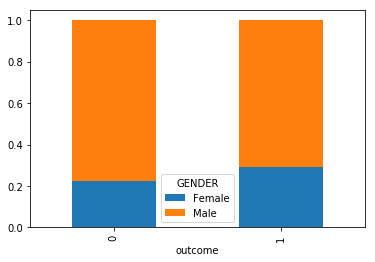

In [62]:
tb_out_gen.div(tb_out_gen.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [87]:
newdat.outcome = newdat.outcome.astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [4]:
pd.concat([data['ACCURACY'].value_counts(), data['ACCURACY'].value_counts(normalize='TRUE')], 
          axis=1, 
          keys=('Freq','Percentage'))

,Freq,Percentage
ROOFTOP,637,0.637
RANGE_INTERPOLATED,131,0.131
APPROXIMATE,125,0.125
GEOMETRIC_CENTER,107,0.107


## T test distance and outcome

In [30]:
from scipy.stats import ttest_ind

In [32]:
out0 = newdat[newdat['outcome']==0]
out1= newdat[newdat['outcome']==1]

In [36]:
ttest_ind(out0['DISTANCE_M'], out1['DISTANCE_M'])

Ttest_indResult(statistic=2.4795623656012813, pvalue=0.01333685706720994)

## Logistic regression

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [5]:
y = np.asarray(newdat.outcome)

In [6]:
X = np.asarray(newdat.DISTANCE_M.astype(float)/1000)

In [7]:
X= X.reshape(-1,1)

In [8]:
len(X)

900

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=40, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (630, 1) (630,)
Test set: (270, 1) (270,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X_train,y_train)
LR

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [27]:
yhat = LR.predict(X_test)

In [20]:
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [29]:
probs = LR.predict_proba(X_test)

In [30]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9333333333333333

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[169   0]
 [ 11   0]]


Confusion matrix, without normalization
[[253   0]
 [ 17   0]]


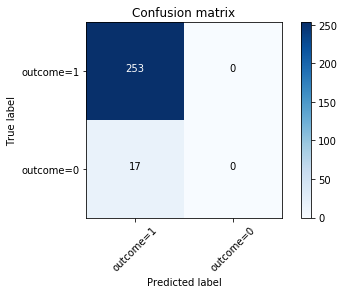

In [24]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['outcome=1','outcome=0'],normalize= False,  title='Confusion matrix')

In [56]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        11
          1       0.94      1.00      0.97       169

avg / total       0.88      0.94      0.91       180



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## AUC and Curve

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [58]:
prob = probs[:, 1]

In [60]:
auc = roc_auc_score(y_test, prob)

In [61]:
auc

0.4677245831091985

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, prob)

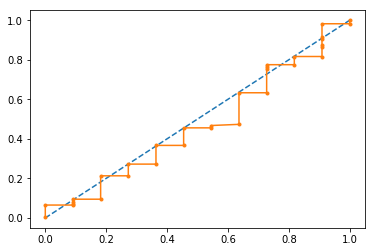

In [63]:
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [66]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, prob)

f1=0.968 auc=0.937 ap=0.939


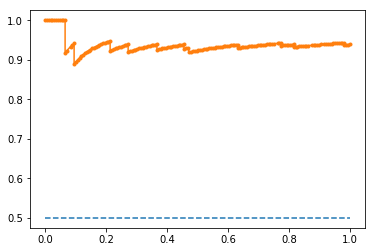

In [68]:
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, yhat)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

In [14]:
def get_age_segment(age):
    if age <= 30:
        return '30-'
    else:
        return '30+'

In [15]:
newdat['age30'] = newdat['AGE'].apply(lambda age: get_age_segment(age))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
def get_age_segment45(age):
    if age <= 45:
        return '45-'
    else:
        return '45+'

In [18]:
newdat['age45'] = newdat['AGE'].apply(lambda age: get_age_segment45(age))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
tb_out_age = pd.crosstab(newdat.outcome, newdat.age30)

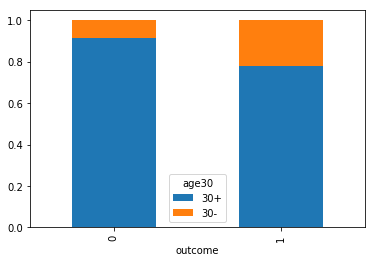

In [23]:
tb_out_age.div(tb_out_age.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [24]:
tb_out_age45 = pd.crosstab(newdat.outcome, newdat.age45)

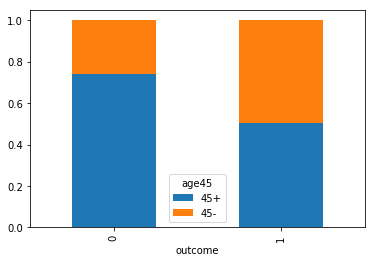

In [25]:
tb_out_age45.div(tb_out_age45.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [69]:
age45d =  {'45-':1,'45+':1}

In [70]:
newdat['age45'] = newdat.age45.apply(lambda x: age45d[x])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
newdat['age45']  =  newdat['age45'].astype(int)

In [72]:
X2 = np.asarray(newdat[['age45', 'DISTANCE_M']])

In [76]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X2).transform(X2)

In [84]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=40, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (720, 2) (720,)
Test set: (180, 2) (180,)


In [85]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [86]:
yhat = LR.predict(X_test)

In [87]:
probs = LR.predict_proba(X_test)

In [88]:
jaccard_similarity_score(y_test, yhat)

0.9333333333333333

In [89]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[168   0]
 [ 12   0]]


Confusion matrix, without normalization
[[169   0]
 [ 11   0]]


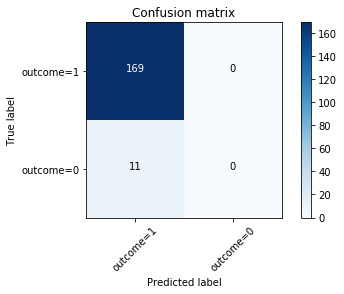

In [83]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['outcome=1','outcome=0'],normalize= False,  title='Confusion matrix')

In [97]:
newdat[['DISTANCE_M','DURATION_SEC']].corr()

,DISTANCE_M,DURATION_SEC
DISTANCE_M,1.000000,0.999835
DURATION_SEC,0.999835,1.000000


In [99]:
pd.concat([newdat['SAU2_3_S_KQ1_ID'].value_counts(), newdat['SAU2_3_S_KQ1_ID'].value_counts(normalize='TRUE')], 
          axis=1, 
          keys=('Freq','Percentage'))

,Freq,Percentage
0,861,0.956667
1,37,0.041111
3,2,0.002222


In [101]:
dill.dump_session(filepath)

In [103]:
pd.concat([newdat.HASHEALTHINSURANCE.value_counts(), newdat.HASHEALTHINSURANCE.value_counts(normalize='TRUE')], 
          axis=1, 
          keys=('Freq','Percentage'))


,Freq,Percentage
False,508,0.564444
True,392,0.435556


In [104]:
tb_out_in = pd.crosstab(newdat.outcome, newdat.HASHEALTHINSURANCE)

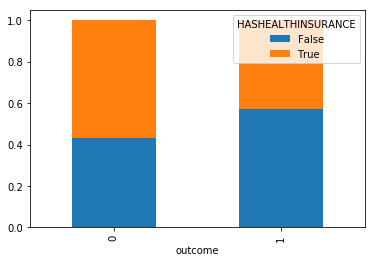

In [105]:
tb_out_in.div(tb_out_in.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

## SVM

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

In [18]:
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
yhat_svm = clf.predict(X_test)
yhat_svm [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        12
          1       0.93      1.00      0.97       168

avg / total       0.87      0.93      0.90       180

Confusion matrix, without normalization
[[168   0]
 [ 12   0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


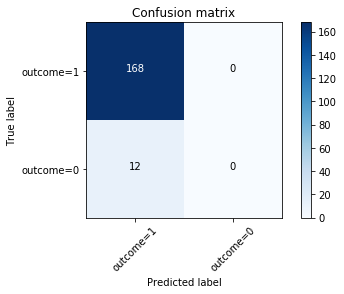

In [21]:
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['outcome=1','outcome=0'],normalize= False,  title='Confusion matrix')

## GEOJSON

In [15]:
from shapely.geometry import Point, shape
import json

with open('vietnam.geojson', encoding="utf-8") as data_file:
    provinces_json = json.load(data_file)




In [18]:
def get_xa(longitude, latitude, provinces_json):
    point = Point(longitude, latitude)
    for record in provinces_json['features']:
        polygon = shape(record['geometry'])
        if polygon.contains(point):
            record['properties']['NAME_3']
    return 'other'

In [23]:
newdat['comm_js'] = newdat.apply(lambda row: get_location(row['PA_LONG'], row['PA_LAT'], provinces_json), axis=1)

In [24]:
newdat.head()

,TXRECORD_CREATEDDATE,SYSTEMID,TREATMENTID,HEALTHINSURANCENUMBER,MOBILE,REGISTRATIONDATE,REGISTRATIONNUMBER,TRANSFERIN,TXMX_FACCODE,TXMX_FACNAME,...,PA_LAT,PA_LONG,FA_LAT,FA_LONG,DISTANCE_M,DURATION_SEC,outcome,age30,age45,comm_js
1,2018-03-23 16:53:19.440000000,2665072,504738,NaN,NaN,2018-01-05 00:00:00,0007,False,1,NaN,...,10.757805,106.706378,10.758377,106.699232,1075,247,1,30+,1,Phường 8
2,2018-01-31 13:48:47.813000000,2614672,490974,CN3929221538646,0939097759,2018-01-22 00:00:00,0007,False,1,NaN,...,10.803733,106.681670,10.805221,106.686853,2586,529,1,30-,1,Phường 3
3,2018-01-08 14:16:58.823000000,2583887,483401,NaN,0987156322,2018-01-05 14:11:10,0007,False,2,HƯNG LONG,...,10.662557,106.620670,10.691301,106.584926,7260,903,0,30+,1,Hưng Long
4,2017-01-10 11:11:41.907000000,2115377,364404,GD4791100114571,0901831654,2017-01-09 11:12:16,0007,False,1,NaN,...,10.788646,106.687393,10.782163,106.682213,2321,502,1,30-,1,Phường 8
5,2018-01-29 10:10:51.477000000,2578674,489966,CK279001010300325,NaN,2018-01-15 10:03:44,0007,False,1,NaN,...,10.752121,106.651341,10.755038,106.671888,2318,543,1,30+,1,Phường 14


In [99]:
newdat['year'] = pd.to_datetime(newdat.REGISTRATIONDATE).dt.year

In [100]:
newdat.head()

,TXRECORD_CREATEDDATE,SYSTEMID,TREATMENTID,HEALTHINSURANCENUMBER,MOBILE,REGISTRATIONDATE,REGISTRATIONNUMBER,TRANSFERIN,TXMX_FACCODE,TXMX_FACNAME,...,PA_LONG,FA_LAT,FA_LONG,DISTANCE_M,DURATION_SEC,outcome,age30,age45,comm_js,year
1,2018-03-23 16:53:19.440000000,2665072,504738,NaN,NaN,2018-01-05 00:00:00,0007,False,1,NaN,...,106.706378,10.758377,106.699232,1075,247,1,30+,1,Phường 8,2018
2,2018-01-31 13:48:47.813000000,2614672,490974,CN3929221538646,0939097759,2018-01-22 00:00:00,0007,False,1,NaN,...,106.681670,10.805221,106.686853,2586,529,1,30-,1,Phường 3,2018
3,2018-01-08 14:16:58.823000000,2583887,483401,NaN,0987156322,2018-01-05 14:11:10,0007,False,2,HƯNG LONG,...,106.620670,10.691301,106.584926,7260,903,0,30+,1,Hưng Long,2018
4,2017-01-10 11:11:41.907000000,2115377,364404,GD4791100114571,0901831654,2017-01-09 11:12:16,0007,False,1,NaN,...,106.687393,10.782163,106.682213,2321,502,1,30-,1,Phường 8,2017
5,2018-01-29 10:10:51.477000000,2578674,489966,CK279001010300325,NaN,2018-01-15 10:03:44,0007,False,1,NaN,...,106.651341,10.755038,106.671888,2318,543,1,30+,1,Phường 14,2018


In [101]:
huyen = newdat[['ADDR_PROV', 'ADDR_DIST', 'DID', 'PROVID', 'year']]

In [102]:
huyen_count = huyen.groupby([huyen.ADDR_PROV, huyen.ADDR_DIST, huyen.DID, huyen.PROVID, huyen.year]).size().reset_index(name='counts')

In [103]:
pd.DataFrame(huyen_count).to_csv("output_huyen.csv", encoding="utf-8-sig", index = False)

In [104]:
xa= newdat[['ADDR_PROV', 'ADDR_DIST', 'DID', 'PROVID','comm_js', 'year']]

In [107]:
xa_count = xa.groupby([xa.ADDR_PROV, xa.ADDR_DIST, xa.DID, xa.PROVID, xa.comm_js, xa.year]).size().reset_index(name='counts')

In [108]:
xa_count

,ADDR_PROV,ADDR_DIST,DID,PROVID,comm_js,year,counts
0,Bình Phước,Thị xã Đồng Xoài,689,70,Tiến Hưng,2017,1
1,Bình Phước,Thị xã Đồng Xoài,689,70,Tiến Thành,2018,1
2,Bình Phước,Thị xã Đồng Xoài,689,70,Tân Bình,2018,1
3,Bình Phước,Thị xã Đồng Xoài,689,70,Tân Thành,2018,1
4,Bến Tre,Thành phố Bến Tre,829,83,Phường 7,2017,1
5,Bến Tre,Thạnh Phú,837,83,An Quy,2018,1
6,Bến Tre,Thạnh Phú,837,83,Phú Long,2018,1
7,Cà Mau,Thành Phố Cà Mau,964,96,Phường 7,2017,1
8,Cà Mau,Thành Phố Cà Mau,964,96,Phường 8,2017,1
9,Cần Thơ,Bình Thủy,918,92,Bình Thủy,2017,2


In [109]:
pd.DataFrame(xa_count).to_csv("output_xa.csv", encoding="utf-8-sig", index = False)

In [110]:
xa1= newdat[['ADDR_PROV', 'ADDR_DIST', 'DID', 'PROVID','ADDR_COMM','year']]

In [111]:
xa_count1 = xa1.groupby([xa1.ADDR_PROV, xa1.ADDR_DIST, xa1.DID, xa1.PROVID, xa1.ADDR_COMM, xa1.year]).size().reset_index(name='counts')

In [112]:
xa_count1

,ADDR_PROV,ADDR_DIST,DID,PROVID,ADDR_COMM,year,counts
0,Bình Phước,Thị xã Đồng Xoài,689,70,Tiến Thành,2018,1
1,Bình Phước,Thị xã Đồng Xoài,689,70,Tân Thành,2017,1
2,Bình Phước,Thị xã Đồng Xoài,689,70,Tân Thành,2018,1
3,Bình Phước,Thị xã Đồng Xoài,689,70,Tân Xuân,2018,1
4,Bến Tre,Thành phố Bến Tre,829,83,Phường 7,2017,1
5,Bến Tre,Thạnh Phú,837,83,An Quy,2018,1
6,Bến Tre,Thạnh Phú,837,83,Phú Khánh,2018,1
7,Cà Mau,Thành Phố Cà Mau,964,96,Phường 8,2017,2
8,Cần Thơ,Bình Thủy,918,92,An Thới,2018,1
9,Cần Thơ,Bình Thủy,918,92,Bùi Hữu Nghĩa,2017,1


In [85]:
pd.DataFrame(xa_count1).to_csv("output_xa1.csv", encoding="utf-8-sig", index = False)